# Hands-on exercise

In this simple example you are required to perform a simple linear regression with scipy. Find all the information on the function in the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

### Assignment

1) Load the provided .csv file with the used car data

2) Use a linear regression to estimate the car prices from the year, kilometers or engine power. You can make a simple 1D regression from each one of the parameters independently (as an optional task you can also try a 2D or 3D regression combining multiple cues)

3) Firstly perform the estimation using the scipy linregress function (or alternatively you can use the sklearn.linear_model.LinearRegression class).
NB: check the documentation of the two methods!! In particular be aware of the number of outputs (in case use "_" to avoid the return of a specific output).

4) Have a look at the correlation coefficient to see which of the 3 features works better

5) Then implement the least square algorithm: you should get exactly the same solution of linregress !

6) Plot the data and the lines representing the output of the linregress and least square algorithms


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv
from scipy import stats
import numpy as np
import sklearn as sl
from sklearn import linear_model

In [2]:
# Load the provided data file with the used car data (you can also have a look at it with any text editor)

filename = "data/km_year_power_price.csv"
lines = csv.reader(open(filename, newline=''), delimiter=',')

dataset = list(lines)

# Convert the numeric part of the data to a NumPy array (skipping the header row)
numeric_data = np.array(dataset[1:], dtype=float)  # Convert the data to float
print(numeric_data)
print("\n")

# Separate each feature into its own NumPy array
km = numeric_data[:, 0]       
year = numeric_data[:, 1]    
powerPS = numeric_data[:, 2]  
avgPrice = numeric_data[:, 3] 

print(km)
print(year)
print(powerPS)
print(avgPrice)

[[1.250000e+05 2.001000e+03 4.000000e+01 1.371110e+03]
 [1.500000e+05 2.001000e+03 4.000000e+01 1.298700e+03]
 [5.000000e+03 2.001000e+03 6.000000e+01 1.232430e+03]
 ...
 [2.000000e+04 2.015000e+03 2.600000e+02 4.949238e+04]
 [1.000000e+04 2.015000e+03 3.000000e+02 3.854269e+04]
 [2.000000e+04 2.015000e+03 3.000000e+02 3.968332e+04]]


[125000. 150000.   5000. ...  20000.  10000.  20000.]
[2001. 2001. 2001. ... 2015. 2015. 2015.]
[ 40.  40.  60. ... 260. 300. 300.]
[ 1371.11  1298.7   1232.43 ... 49492.38 38542.69 39683.32]


Use linear regression to estimate the car prices from the year, kilometers or engine power. 
You can make a simple 1D regression from each one of the parameters independently 




In [3]:
# linear regression with linregress (estimate price from year)
slope1, intercept1, r1, p_value1, std_err1 = stats.linregress(year, avgPrice)

print(slope1, intercept1)

1509.093825335221 -3018309.484956958


1509.0938253352153 -3018309.484956946


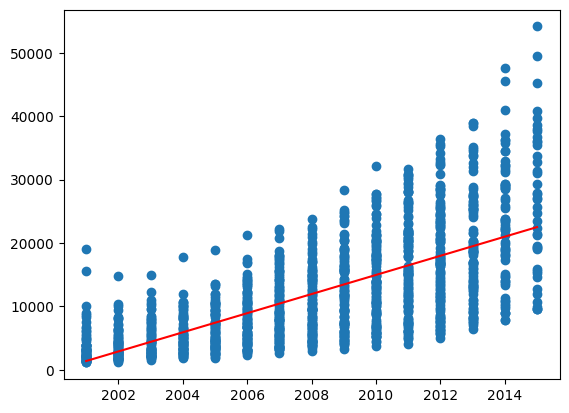

In [4]:
# (Optional) linear regression with linear_model.LinearRegression() (estimate price from year)
# Recall that in Python a mx1 matrix is different from a 1D array -> need to reshape

# Reshape data to get a matrix
new_year = year.reshape(-1, 1)

# Fit the model
reg = linear_model.LinearRegression()
reg.fit(new_year, avgPrice)

# Show parameters
slope = reg.coef_[0]      
intercept = reg.intercept_ 

print(slope, intercept)

plt.scatter(new_year, avgPrice)
plt.plot(new_year, intercept + slope*new_year, color="red")
plt.show()

In [5]:
# (Optional) perform linear regression with a manually implemented least squares (estimate price from year)
# You should get exactly the same solution of linregress !

def linear_regression(x, y):
    num, den = 0, 0

    for i, j in zip(x, y):
        num += (i - np.mean(x))*(j - np.mean(y))
        den += (i - np.mean(x))**2
    
    slope = num/den
    intercept = np.mean(y) - slope*np.mean(x)

    return slope, intercept

print(linear_regression(year, avgPrice))

(1509.0938253351871, -3018309.48495689)


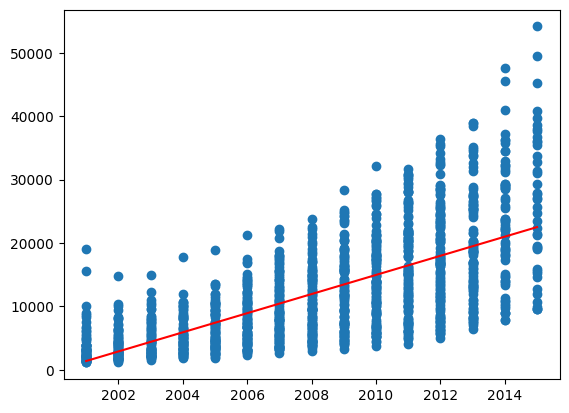

In [6]:
# Plot the data and the lines representing the output of the linregress and least square algorithms

plt.scatter(year, avgPrice)
plt.plot(year, intercept1 + slope1*year, color="red")
plt.show()

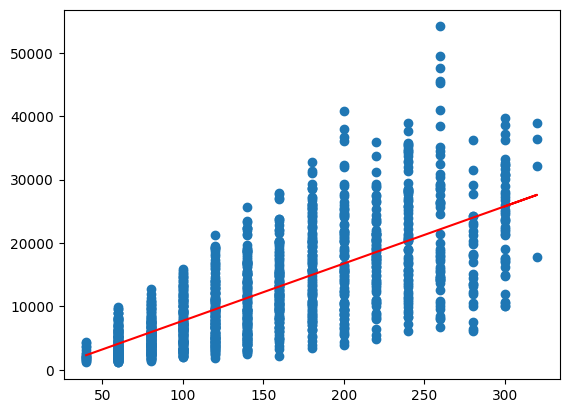

In [7]:
# linear regression with linregress (estimate price from power)

slope2, intercept2, r2, p_value2, std_err2 = stats.linregress(powerPS, avgPrice)

plt.scatter(powerPS, avgPrice)
plt.plot(powerPS, intercept2 + slope2*powerPS, color="red")
plt.show()

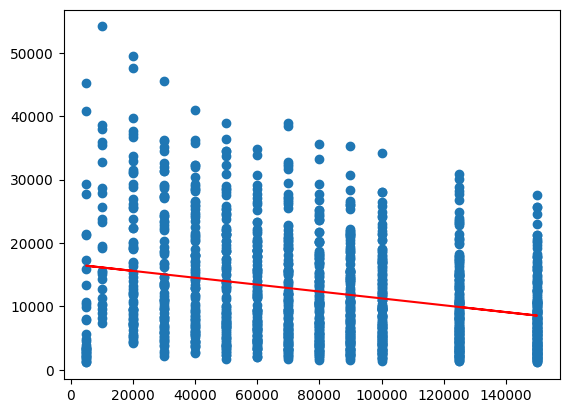

In [8]:
# linear regression with linregress (estimate price from km)

slope3, intercept3, r3, p_value3, std_err3 = stats.linregress(km, avgPrice)

plt.scatter(km, avgPrice)
plt.plot(km, intercept3 + slope3*km, color="red")
plt.show()

In [9]:
# Have a look at the correlation coefficients to see which of the 3 features works better

print(r1, r2, r3)

0.676704316909544 0.7085500315263967 -0.2572867429988497


(1297, 2)
(1297,)
Intercept: -2661196.7867489993
Coefficients: [1325.2284004    80.43004469]


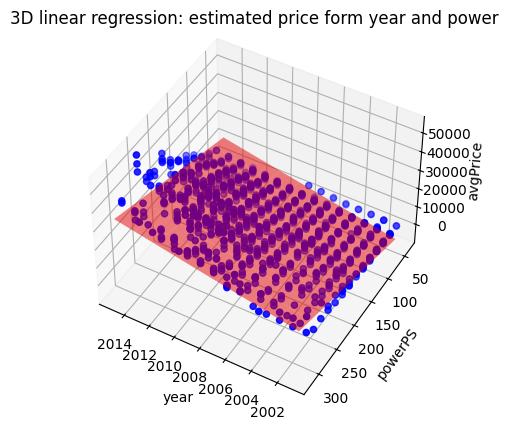

In [10]:
# (Optional) 2D linear regression with linear model (estimate price from year and power)

# Define the input matrix
X = np.column_stack((year,powerPS))
print(np.shape(X))
print(np.shape(avgPrice))

# Define and fit the model
reg = linear_model.LinearRegression()
reg.fit(X, avgPrice)

# Print regression parameters
print(f"Intercept: {reg.intercept_}")
print(f"Coefficients: {reg.coef_}")

# Show results

# Create a grid to represent the regression plane
year_range = np.linspace(min(year), max(year), 10)   
power_range = np.linspace(min(powerPS), max(powerPS), 10)  

# Create a 2D meshgrid to represent all combinations of year and powerPS
year_grid, power_grid = np.meshgrid(year_range, power_range)

# Use the model to predict the prices on the grid
Z = reg.predict(np.column_stack((year_grid.ravel(), power_grid.ravel()))).reshape(year_grid.shape)

# 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(year, powerPS, avgPrice, color='blue', label='Dati reali')
ax.plot_surface(year_grid, power_grid, Z, color='red', alpha=0.5, label='Piano di regressione')

ax.set_xlabel("year")
ax.set_ylabel("powerPS")
ax.set_zlabel("avgPrice")

# Rotate the plot
ax.view_init(elev=45, azim=120)  

plt.title("3D linear regression: estimated price form year and power")
plt.show()